# British Columbia Assessment Report Analysis of Prospector Contributions

This notebook contains the code for determining the contributions of prospectors working on projects within British Columbia over a one year period including: monetary (paid and unpaid), number of projects (solo operated and worked by a company).

We will go through the following in this notebook:

 - Exploring the Data
 - Processing the Data
 - Calculating the Contributions

## Exploring and Processing the Data

We first have to read in the CSV file that we've been given. We'll use a package called pandas for that:

In [26]:
import numpy as np
import pandas as pd
import pip
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns

**Fix random seed for reproducibility**

In [27]:
np.random.seed(333)

**Import and view the data**

In [28]:
# Read .csv, use encoding option and set dates as confidentialty access date
aris = pd.read_csv('arisdata2_20200403.csv', encoding = "ISO-8859-1", parse_dates=['conf_adate'], low_memory=False)

In [29]:
# Show file
aris

,rep_no,cnf_prd,aff_dt,gwrk_typs,claim_val,title,rep_yr,wrk_yr,conf_ldate,conf_adate,...,com_nms,kwl_nms,MERG_SPENT,DOLL_INX,doll_86,CPIdex1992,doll_92,CPIdex2002,doll_02,URL
0,1,1.0,1947/1/1,GEOL:,0,Geological Report on the Moyie Groups 1-6 and ...,1947,1947.0,NaN,1948-01-01,...,"Silver, Gold",NaN,6000.00,0.157,38216.560510,0.123,48780.487800,0.104,57692.30769,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
1,3,1.0,1947/1/1,GEOL:,0,"Geological Investigation of the Lyons Group, T...",1947,1947.0,NaN,1948-01-01,...,NaN,NaN,NaN,0.157,NaN,0.123,NaN,0.104,NaN,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
2,4,1.0,1947/1/1,GEOL:,0,The Geology of the M2-5 Mineral Calims,1947,1947.0,NaN,1948-01-01,...,NaN,NaN,556.79,0.157,3546.433121,0.123,4526.747967,0.104,5353.75000,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
3,5,1.0,1947/1/1,GEOP:,0,Report on the Geophysical Survey on the Proper...,1947,1947.0,NaN,1948-01-01,...,NaN,NaN,NaN,0.157,NaN,0.123,NaN,0.104,NaN,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
4,6,1.0,1947/1/1,GEOP:,0,"Magnetometre Survey on the Dipper, War Eagle, ...",1947,1946.0,NaN,1948-01-01,...,NaN,NaN,NaN,0.157,NaN,0.123,NaN,0.104,NaN,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37305,38368,NaN,2019/6/28,GEOP:,26173,Geophysical Survey with 2D Resistivity,2019,2019.0,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
37306,38369,NaN,2019/7/9,GEOL:GEOP:GEOC:PROS:,2541,2019 Assessment Report on the Mayner's Fortune...,2019,2019.0,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
37307,38370,NaN,2019/7/9,DRIL:,10591,HD Mineral Prospect - Diamond Drilling 2019,2019,2019.0,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
37308,38371,NaN,2019/7/24,GEOP:,131028,Report on the Dark Horse Property - Induced Po...,2019,2019.0,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://aris.empr.gov.bc.ca/search.asp?mode=rep...


In [30]:
# View dataframe info
aris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37310 entries, 0 to 37309
Data columns (total 55 columns):
rep_no        37310 non-null int64
cnf_prd       36896 non-null float64
aff_dt        37310 non-null object
gwrk_typs     37310 non-null object
claim_val     37310 non-null int64
title         33519 non-null object
rep_yr        37310 non-null int64
wrk_yr        29284 non-null float64
conf_ldate    0 non-null float64
conf_adate    36896 non-null datetime64[ns]
aff_ndate     0 non-null float64
aff_adate     37310 non-null object
page_ct       37310 non-null int64
prpty_nm      33517 non-null object
nts_maps      37310 non-null object
bcgs_maps     37310 non-null object
lat83_deg     37310 non-null int64
lat83_min     37310 non-null int64
lat83_sec     37310 non-null int64
lon83_deg     37310 non-null int64
lon83_min     37310 non-null int64
lon83_sec     37310 non-null int64
zone83        37310 non-null int64
north83       37310 non-null int64
east83        37310 non-null int64


**Bar Graphs Expenditures Per Year**

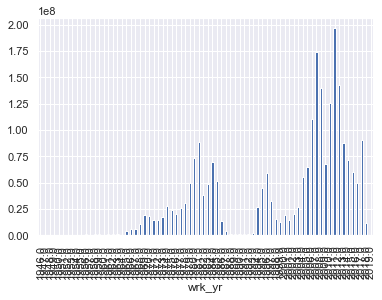

In [31]:
#Sum of Expenditures in 2002 CAD per Work Year (wrk_yr) 
aris.groupby('wrk_yr').doll_02.sum().plot(kind='bar')

In [32]:
sns.set(font_scale=1.0)

def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

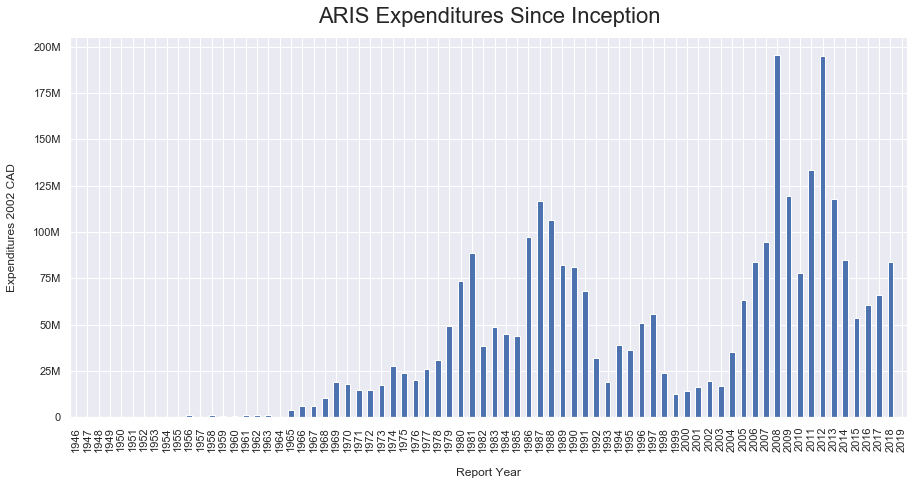

In [34]:
# Too many blanks in Work Year
ax = aris.groupby('rep_yr').doll_02.sum().plot(kind='bar', figsize=(15,7))
plt.xlabel('Report Year', labelpad=16)
plt.ylabel('Expenditures 2002 CAD', labelpad=16)
plt.title('ARIS Expenditures Since Inception', y=1.02, fontsize=22)

ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));


plt.show()

In [ ]:
# Subset data to June-Aug 2005
precip_june_aug_2005 = precip_2003_2013_daily['2005-06-01':'2005-08-31']

# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(precip_june_aug_2005.index.values,
       precip_june_aug_2005['DAILY_PRECIP'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nJune - Aug 2005 for Boulder Creek")

plt.show()

**Extract Data for the Relevant Year**

In [21]:
# Is the year the work was conducted equal to 2018?
# is_2018 is a boolean variable with True or False in it
is_2018 = aris['wrk_yr']==2018
# Show the first few rows (head)
print(is_2018.head())

0    False
1    False
2    False
3    False
4    False
Name: wrk_yr, dtype: bool


In [22]:
# Filter the rows for the year using the boolean variable is_2018
aris_2018 = aris[is_2018]
# Show number of records and columns for subset aris_2018
print(aris_2018.shape)

(743, 55)


In [23]:
# Show the first few records of the subset
aris_2018.to_csv("aris_2018.csv") # Check for blanks in own_nms
aris_2018

,rep_no,cnf_prd,aff_dt,gwrk_typs,claim_val,title,rep_yr,wrk_yr,conf_ldate,conf_adate,...,com_nms,kwl_nms,MERG_SPENT,DOLL_INX,doll_86,CPIdex1992,doll_92,CPIdex2002,doll_02,URL
35891,36916,1.0,2017/3/15,GEOC:,10955,Reconnaissance Biogeochemistry and Soil Geoche...,2018,2018.0,NaN,2018-03-15,...,"Gold, Silver, Lead","Snowshoe Group, Snowshoe Group, Greenstones, G...",11684.42,1.926,6066.677051,1.514,7717.582563,1.284,9100.015576,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
35973,37004,1.0,2017/7/17,GEOC:,1710,North Zacta Area - Geochemical Sampling Project,2018,2018.0,NaN,2018-07-17,...,"Gold, Copper, Nickel","Cretaceous-Tertiary, Slollicum schist, Greensc...",1766.29,1.926,917.076843,1.514,1166.638045,1.284,1375.615265,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
36006,37038,1.0,2017/8/4,GEOC:,5395,Franklin Project,2018,2018.0,NaN,2018-08-04,...,"Gold, Silver, Copper","Carboniferous-Permian, Harper Ranch Group, Vol...",5426.26,1.926,2817.372793,1.514,3584.055482,1.284,4226.059190,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
36007,37039,NaN,2017/11/10,PROS:,303,Prospecting Report,2018,2018.0,NaN,NaT,...,NaN,NaN,NaN,1.926,NaN,1.514,NaN,1.284,NaN,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
36023,37056,1.0,2018/1/30,GEOC:,1915,Geochemical Report on an MMI Soil Geochemistry...,2018,2018.0,NaN,2019-01-30,...,"Copper, Molybdenum/Molybdenite","Triassic, Nicola Group, Marine sedimentary and...",1397.00,1.926,725.337487,1.514,922.721268,1.284,1088.006231,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37292,38355,NaN,2019/4/18,GEOC:,101107,2018 Geochemical Rock and Soil Sampling of the...,2019,2018.0,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
37294,38357,NaN,2018/10/30,PROS:,311,Prospecting and Geochemistry on the 640895 BC ...,2019,2018.0,NaN,NaT,...,Gold,"Eocene-Oligocene, Mount Washington Plutonic Su...",5675.00,NaN,NaN,NaN,NaN,NaN,NaN,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
37297,38360,NaN,2019/3/30,GEOL:GEOP:GEOC:DRIL:PROS:,2802681,"Drilling, Geophysical & Geochemical Exploratio...",2019,2018.0,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
37300,38363,NaN,2019/3/29,GEOL:GEOC:,63067,Report on Airborne VTEM and Magnetic Surveys o...,2019,2018.0,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://aris.empr.gov.bc.ca/search.asp?mode=rep...


**Extract Prospectors as Owners for the Relevant Year**

In [24]:
# Does the owner name not contain Ltd, Limited, Corporation, Corp, Inc?
aris_prospectors = aris_2018[~aris_2018['own_nms'].str.contains
                             ('Ltd|Limited|Corp|Corporation|Inc|Group|Resources|Associates|Minerals|Mineral|Partnership|LLC|Syndicate|Partners', case=False)]
# Save file
aris_prospectors.to_csv("aris_2018prospectors.csv")
# Show records
aris_prospectors

,rep_no,cnf_prd,aff_dt,gwrk_typs,claim_val,title,rep_yr,wrk_yr,conf_ldate,conf_adate,...,com_nms,kwl_nms,MERG_SPENT,DOLL_INX,doll_86,CPIdex1992,doll_92,CPIdex2002,doll_02,URL
35973,37004,1.0,2017/7/17,GEOC:,1710,North Zacta Area - Geochemical Sampling Project,2018,2018.0,NaN,2018-07-17,...,"Gold, Copper, Nickel","Cretaceous-Tertiary, Slollicum schist, Greensc...",1766.29,1.926,917.076843,1.514,1166.638045,1.284,1375.615265,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
36006,37038,1.0,2017/8/4,GEOC:,5395,Franklin Project,2018,2018.0,NaN,2018-08-04,...,"Gold, Silver, Copper","Carboniferous-Permian, Harper Ranch Group, Vol...",5426.26,1.926,2817.372793,1.514,3584.055482,1.284,4226.059190,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
36007,37039,NaN,2017/11/10,PROS:,303,Prospecting Report,2018,2018.0,NaN,NaT,...,NaN,NaN,NaN,1.926,NaN,1.514,NaN,1.284,NaN,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
36106,37142,NaN,2017/11/7,GEOC:,1708,Edgerunner Mineral Titles Tenure #1047782 Vict...,2018,2018.0,NaN,NaT,...,"Copper, Silver, Gold","Paleozoic-Jurassic, Westcoast Crystalline Comp...",3675.00,1.926,1908.099688,1.514,2427.344782,1.284,2862.149533,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
36258,37299,1.0,2017/11/28,GEOL:,12555,Report on Geological Investigations and Interp...,2017,2018.0,NaN,2018-11-28,...,"Gold, Silver","Triassic-Jurassic, Brooks Diorite Complex, Dio...",8823.31,1.875,4705.765333,1.474,5985.963365,1.250,7058.648000,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37267,38330,NaN,2019/4/3,GEOC:PROS:,6914,Assessment Report Describing Rock and Soil Geo...,2019,2018.0,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
37272,38335,1.0,2018/12/24,GEOC:,3067,Geochemical and Prospecting Report on the Mt. ...,2019,2018.0,NaN,2019-12-24,...,"Gold, Silver, Arsenic","Triassic, Vancouver Group, Karmutsen Formation...",3067.87,NaN,NaN,NaN,NaN,NaN,NaN,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
37276,38339,NaN,2019/3/25,PROS:GEOC:,2946,Technical Report on the Triple 9 Property,2018,2018.0,NaN,NaT,...,NaN,NaN,NaN,1.926,NaN,1.514,NaN,1.284,NaN,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
37278,38341,NaN,2019/3/29,GEOL:GEOP:GEOC:DRIL:PROS:,47141,"Prospecting, Geological Mapping, Test Pitting ...",2019,2018.0,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://aris.empr.gov.bc.ca/search.asp?mode=rep...


In [33]:
# Does the owner name contain Ltd, Limited, Corporation, Corp, Inc?
aris_companies = aris_2018[aris_2018['own_nms'].str.contains
                             ('Ltd|Limited|Corp|Corporation|Inc|Group|Resources|Associates|Minerals|Mineral|Partnership|LLC|Syndicate|Partners', 
                              case=False)]
# Save file
aris_companies.to_csv("aris_2018companies.csv")
# Show records
aris_companies

,rep_no,cnf_prd,aff_dt,gwrk_typs,claim_val,title,rep_yr,wrk_yr,conf_ldate,conf_adate,...,com_nms,kwl_nms,MERG_SPENT,DOLL_INX,doll_86,CPIdex1992,doll_92,CPIdex2002,doll_02,URL
35891,36916,1.0,2017/3/15,GEOC:,10955,Reconnaissance Biogeochemistry and Soil Geoche...,2018,2018.0,NaN,2018-03-15,...,"Gold, Silver, Lead","Snowshoe Group, Snowshoe Group, Greenstones, G...",11684.42,1.926,6066.677051,1.514,7717.582563,1.284,9100.015576,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
36023,37056,1.0,2018/1/30,GEOC:,1915,Geochemical Report on an MMI Soil Geochemistry...,2018,2018.0,NaN,2019-01-30,...,"Copper, Molybdenum/Molybdenite","Triassic, Nicola Group, Marine sedimentary and...",1397.00,1.926,725.337487,1.514,922.721268,1.284,1088.006231,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
36141,37179,1.0,2017/10/10,GEOP:,813,Interpretive Report on BC Government Airborne ...,2018,2018.0,NaN,2018-10-10,...,"Gold, Silver, Lead, Zinc, Copper","Jurassic, Hazelton Group, Salmon River Formati...",695.00,1.926,360.851506,1.514,459.048877,1.284,541.277259,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
36162,37200,1.0,2017/10/18,GEOC:,27722,Geological & Geochemical Assessment Report on ...,2018,2018.0,NaN,2018-10-18,...,"Copper, Lead, Zinc, Gold, Silver","Triassic, Nicola Group, Volcanic rocks, Sedime...",31565.00,1.926,16388.888890,1.514,20848.745050,1.284,24583.333330,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
36341,37383,1.0,2018/1/3,GEOL:GEOC:,4487,Geochemical & Petrographic Assessment Report o...,2018,2018.0,NaN,2019-01-03,...,"Copper, Gold","Triassic, Nicola Group, Eastern Volcanic Facie...",4500.00,1.926,2336.448598,1.514,2972.258917,1.284,3504.672897,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37291,38354,NaN,2019/4/15,GEOC:PROS:,6916,Prelimenary Assessment of the Mineral Prospect...,2019,2018.0,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
37294,38357,NaN,2018/10/30,PROS:,311,Prospecting and Geochemistry on the 640895 BC ...,2019,2018.0,NaN,NaT,...,Gold,"Eocene-Oligocene, Mount Washington Plutonic Su...",5675.00,NaN,NaN,NaN,NaN,NaN,NaN,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
37297,38360,NaN,2019/3/30,GEOL:GEOP:GEOC:DRIL:PROS:,2802681,"Drilling, Geophysical & Geochemical Exploratio...",2019,2018.0,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
37300,38363,NaN,2019/3/29,GEOL:GEOC:,63067,Report on Airborne VTEM and Magnetic Surveys o...,2019,2018.0,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://aris.empr.gov.bc.ca/search.asp?mode=rep...


In [32]:
# Does the operator name for the prospector owned project not contain Ltd, Limited, Corporation, Corp, Inc?
aris_prospector_runned = aris_prospectors[~aris_prospectors['oper_nms'].str.contains
                             ('Ltd|Limited|Corp|Corporation|Inc|Group|Resources|Associates|Minerals|Mineral|Partnership|LLC|Syndicate|Partners', 
                              case=False)]
# Save file
aris_prospector_runned.to_csv("aris_2018prospector_runned.csv")
# Show records
aris_prospector_runned

,rep_no,cnf_prd,aff_dt,gwrk_typs,claim_val,title,rep_yr,wrk_yr,conf_ldate,conf_adate,...,com_nms,kwl_nms,MERG_SPENT,DOLL_INX,doll_86,CPIdex1992,doll_92,CPIdex2002,doll_02,URL
36007,37039,NaN,2017/11/10,PROS:,303,Prospecting Report,2018,2018.0,NaN,NaT,...,NaN,NaN,NaN,1.926,NaN,1.514,NaN,1.284,NaN,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
36106,37142,NaN,2017/11/7,GEOC:,1708,Edgerunner Mineral Titles Tenure #1047782 Vict...,2018,2018.0,NaN,NaT,...,"Copper, Silver, Gold","Paleozoic-Jurassic, Westcoast Crystalline Comp...",3675.00,1.926,1908.099688,1.514,2427.344782,1.284,2862.149533,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
36291,37332,1.0,2017/8/15,GEOP:,5679,Reconnaissance Ground VLF-EM Geophysical Surve...,2018,2018.0,NaN,2018-08-15,...,"Gold, Nickel, Platinum","Proterozoic-Paleozoic, Snowshoe Group, Ramos S...",4604.00,1.926,2390.446521,1.514,3040.951123,1.284,3585.669782,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
36339,37381,1.0,2018/1/2,GEOL:GEOP:GEOC:,4282,Interpretation Report Vanhall/VMS Property - 2017,2018,2018.0,NaN,2019-01-02,...,"Copper, Gold, Cobalt, Silver, Zinc, Lead","Triassic, Vancouver Group, Karmutsen Formation...",3000.00,1.926,1557.632399,1.514,1981.505945,1.284,2336.448598,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
36369,37411,1.0,2018/1/16,GEOL:PROS:,13175,Geological & Prospecting Assessment Report,2018,2018.0,NaN,2019-01-16,...,Gemstones,"Carboniferous-Permian, Metamorphic rocks, Dyke...",11177.00,1.926,5803.219107,1.514,7382.430647,1.284,8704.828660,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37239,38302,NaN,2019/4/4,DRIL:,41403,Drilling Report of China Knows Mineral Claims,2019,2018.0,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
37267,38330,NaN,2019/4/3,GEOC:PROS:,6914,Assessment Report Describing Rock and Soil Geo...,2019,2018.0,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
37272,38335,1.0,2018/12/24,GEOC:,3067,Geochemical and Prospecting Report on the Mt. ...,2019,2018.0,NaN,2019-12-24,...,"Gold, Silver, Arsenic","Triassic, Vancouver Group, Karmutsen Formation...",3067.87,NaN,NaN,NaN,NaN,NaN,NaN,http://aris.empr.gov.bc.ca/search.asp?mode=rep...
37276,38339,NaN,2019/3/25,PROS:GEOC:,2946,Technical Report on the Triple 9 Property,2018,2018.0,NaN,NaT,...,NaN,NaN,NaN,1.926,NaN,1.514,NaN,1.284,NaN,http://aris.empr.gov.bc.ca/search.asp?mode=rep...


**Bar Graph Total Expenditures Prospectors, Companies and Projects Owned by Prospectors but Operated by Companies**

ValueError: shape mismatch: objects cannot be broadcast to a single shape

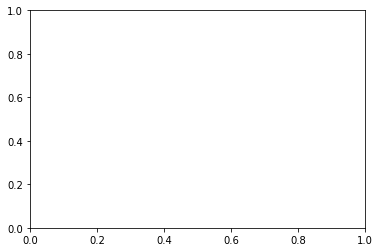

In [28]:
owners = (aris_prospectors['wrk_yr'], aris_companies['wrk_yr'])
y_pos = np.arange(len(owners))
expenditures = (aris_prospectors['doll_02'], aris_companies['doll_02'])

plt.bar(owners, expenditures, align='center', alpha=0.5)
plt.xticks(y_pos, owners)
plt.ylabel('Expenses 2002 CAD')
plt.title('Expenses')

plt.show()